<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning - 2301CS621</b></center>

<center><b><h1>Lab - 9 </b></center>
<center><b><h5>K-means, K-Medoids</b></center>
<pre>    

# Name : Krish V. Gohel
### EnrNo : 22010101060
### RollNO : 188

# Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the Dataset
Load Given dataset -  StudentsPerformance.csv

In [2]:
dt = pd.read_csv("StudentsPerformance.csv")

In [3]:
dt

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


# Step 3: Data Overview
In this step, we examine the dataset structure, summary statistics, and check for missing values.

In [4]:
dt.info

<bound method DataFrame.info of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none    

# Step 4: Display PairPlot

C:\Users\Krish\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


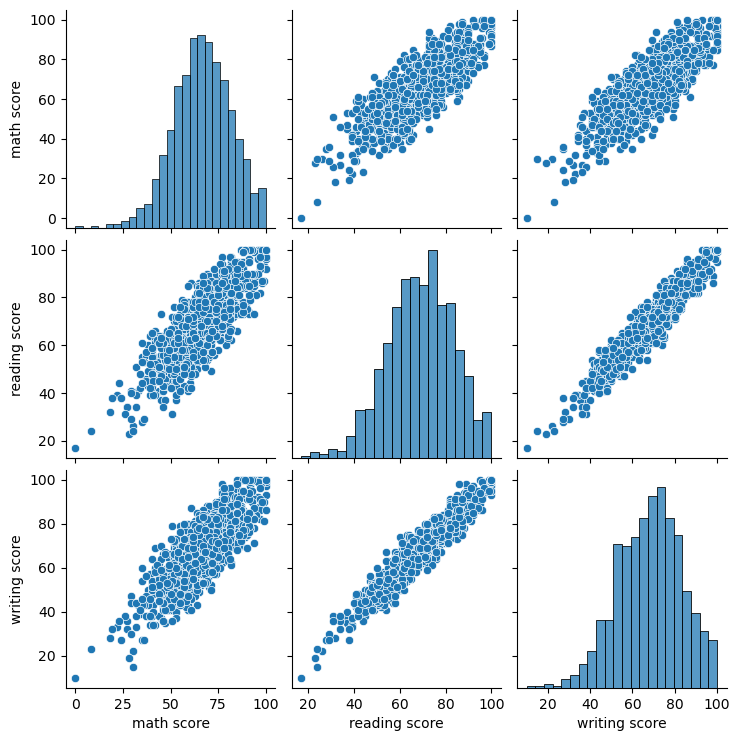

In [5]:
sns.pairplot(dt)

# Step 5: Correlation heatmap

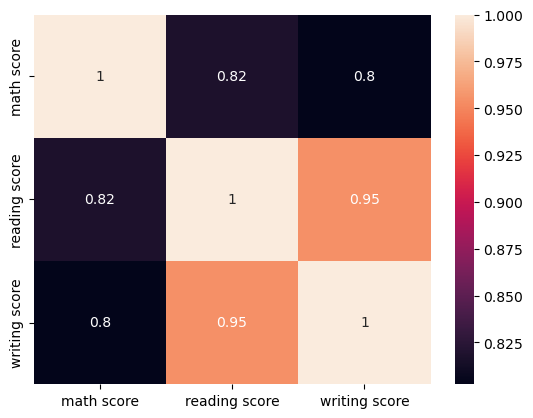

In [6]:
sns.heatmap(dt[['math score','reading score','writing score']].corr(),annot=True)
plt.show()

# Step 6: Distribution of numerical features

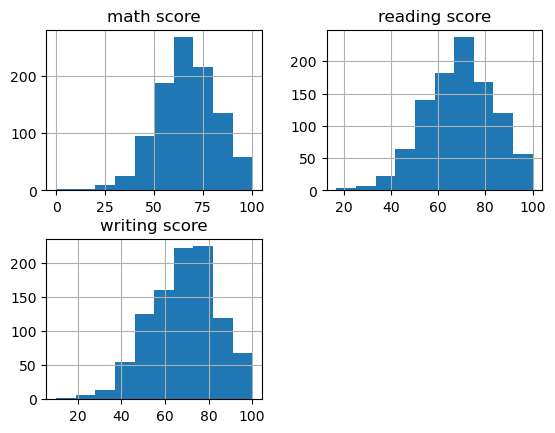

In [7]:
dt.hist()
plt.show()

# Step 7: Apply StandardScaler

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
ss = StandardScaler()

In [10]:
x = dt[['math score','reading score','writing score']]

In [11]:
x_transform = ss.fit_transform(x)

# Step 8: Elbow method to find optimal k

In [16]:
d = []
for k in range(1,11):
    model = KMeans(n_clusters=k,random_state=42)
    model.fit(x_transform)
    d.append(model.inertia_)

C:\Users\Krish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Krish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Krish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Krish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

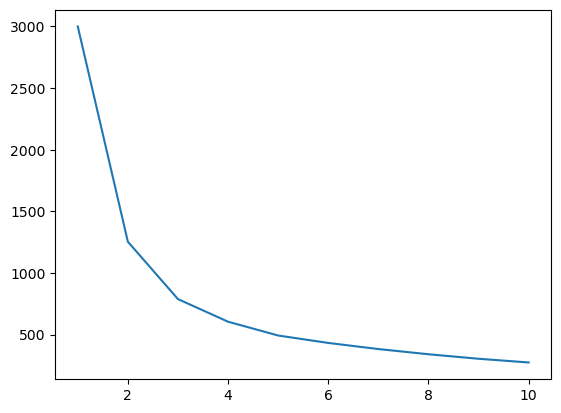

In [17]:
plt.plot(range(1,11),d)

# Step 9:Based on the elbow plot, choose an appropriate k value (e.g., k=3)

In [13]:
from sklearn.cluster import KMeans

In [14]:
model = KMeans(n_clusters=3,random_state=42)

In [15]:
model.fit(x_transform)

C:\Users\Krish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Krish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

# Step 10: Print Cluster Center

In [18]:
model.cluster_centers_

array([[-0.45113323, -0.0400068 ,  0.05106839],
       [-1.22224847, -0.71248813, -0.6841531 ],
       [ 0.97856528,  1.21210691,  1.22273703],
       [-0.27520168, -0.80586567, -0.82597194],
       [ 1.75441074,  1.7422334 ,  1.71166377],
       [-2.57094841, -2.44141724, -2.43144988],
       [-1.18376095, -1.48456197, -1.51790315],
       [ 1.08696537,  0.5566181 ,  0.45664717],
       [ 0.37281064, -0.1390999 , -0.1701623 ],
       [ 0.15739233,  0.59066172,  0.61771544]])

In [19]:
dt['kmeans'] = model.labels_

In [20]:
dt['kmeans'].value_counts()

kmeans
9    156
0    135
8    115
2    112
3    110
6    101
7     96
1     92
4     59
5     24
Name: count, dtype: int64

# Step 11: Plot Cluster

<Axes: xlabel='reading score', ylabel='writing score'>

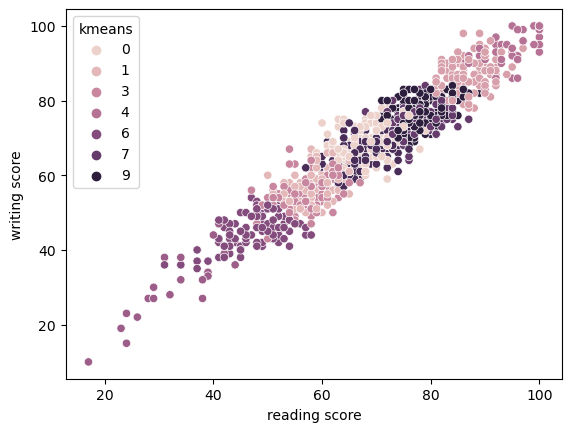

In [21]:
sns.scatterplot(dt,x=dt['reading score'],y=dt['writing score'],hue=dt['kmeans'])

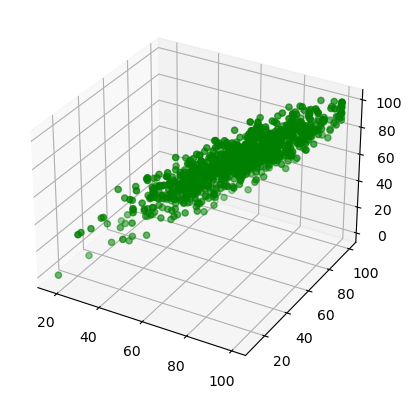

In [22]:
ax = plt.axes(projection ="3d")
ax.scatter3D(dt['reading score'],dt['writing score'], dt['math score'], color = "green")
plt.show()

# Step 12:Analyze clusters 

In [23]:
dt['total'] = dt['reading score'] + dt['math score'] + dt['writing score']

In [24]:
gb = dt.groupby('kmeans')

In [25]:
for k,cluster_data in gb:
    print(k,cluster_data['total'].min(),cluster_data['total'].max())
    print('----')

0 182 210
----
1 147 180
----
2 239 269
----
3 157 189
----
4 266 300
----
5 27 117
----
6 115 158
----
7 220 255
----
8 191 219
----
9 210 240
----


In [26]:
dt[dt['kmeans']== 1]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,kmeans,total
9,female,group B,high school,free/reduced,none,38,60,50,1,148
14,female,group A,master's degree,standard,none,50,53,58,1,161
19,female,group C,associate's degree,free/reduced,none,54,58,61,1,173
22,male,group D,some college,standard,none,44,54,53,1,151
37,female,group D,some high school,free/reduced,none,50,64,59,1,173
...,...,...,...,...,...,...,...,...,...,...
958,female,group D,high school,standard,none,45,63,59,1,167
961,female,group D,some high school,free/reduced,none,48,54,53,1,155
972,female,group A,high school,free/reduced,completed,53,50,60,1,163
973,female,group D,some college,free/reduced,none,49,65,61,1,175


# Step 13: Perform K-Medoids

In [34]:
pip install scikit-learn-extra

Note: you may need to restart the kernel to use updated packages.


In [35]:
from sklearn_extra.cluster import KMedoids

In [29]:
model1 = KMedoids(n_clusters=3,random_state=50)

In [30]:
model1.fit(x_transform)

KMedoids(n_clusters=3, random_state=50)

In [32]:
x_transform[model1.medoid_indices_]

array([[-0.00587246,  0.19399858,  0.12812699],
       [-0.99561237, -0.90242577, -0.99117351],
       [ 0.9178848 ,  1.08484337,  1.11574507]])

In [33]:
model1.labels_

array([0, 2, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 1, 2, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 1, 0, 1, 2, 2, 0,
       0, 2, 0, 1, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 0, 0, 0,
       2, 1, 1, 1, 2, 2, 2, 2, 1, 0, 2, 2, 2, 1, 2, 2, 0, 0, 2, 1, 2, 1,
       2, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1,
       0, 2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 2, 1, 0, 2, 0, 0, 2, 2, 0, 1, 2,
       1, 0, 0, 2, 0, 1, 1, 0, 1, 0, 0, 0, 1, 2, 0, 2, 0, 0, 2, 1, 0, 1,
       1, 2, 2, 0, 0, 0, 1, 0, 0, 2, 2, 0, 2, 1, 1, 1, 2, 2, 2, 1, 0, 1,
       0, 2, 1, 2, 0, 1, 0, 1, 0, 2, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2,
       1, 1, 0, 2, 2, 0, 0, 1, 1, 2, 0, 2, 1, 0, 0, 2, 0, 0, 0, 2, 1, 2,
       0, 1, 0, 0, 2, 0, 0, 1, 1, 0, 2, 2, 2, 0, 2, 0, 1, 1, 2, 0, 1, 2,
       2, 2, 2, 2, 0, 0, 1, 0, 2, 0, 1, 0, 1, 2, 2,

# Step:14 Comparison of K-means and K-medoids Clusters

# Step: 15 Implement K- Means with Library
# Sample data points
data = [
    [1, 2], [2, 3], [3, 4],
    [10, 11], [11, 12], [12, 13],
    [50, 51], [51, 52], [52, 53]
]

In [55]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import math
import numpy as np

In [139]:
data = [ [1, 2], [2, 3], [3, 4], [10, 11], [11, 12], [12, 13], [50, 51], [51, 52], [52, 53] ]

KMeanDemo = KMeans(n_clusters=3)

KMeanDemo.fit_predict(data)


C:\Users\Krish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Krish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 2, 2, 2, 1, 1, 1])

In [42]:
Model2 = KMeanDemo.fit_predict(data)

C:\Users\Krish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Krish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [51]:
def distance(x1,x2):
    return math.sqrt(((x1[0] - x2[0])**2) + ((x1[1] - x2[1])**2))

In [129]:
def upate_cluster_center(cluster_data):
    sum = [0,0]
    if len(cluster_data) == 0:
        return sum
    for i in cluster_data:
        sum[0] = sum[0] + i[0]
        sum[1] = sum[1] + i[1]
    return [sum[0]/len(cluster_data),sum[1]/len(cluster_data)]

In [149]:
def kmeans_du(k,data):
    centers = [data[np.random.randint(0,len(data))] for i in range(0,k)]
    
    Cluster_data = [[] for i in range(0,k)]
    print(Cluster_data)
    for i in range(0,k):
        Cluster_data[i].append(centers[i])
    print(Cluster_data)
    
    for j in range(0,len(data)):
       # Cluster_data = [[] for i in range(0,k)]
        
        for d in data:
            mindistance = []
            for i in range(0,k):
                mindistance.append(distance(centers[i],d))
            print(mindistance)
            
        #empty cluster data
        Cluster_data[mindistance.index(min(mindistance))].append(d)
        print("-----"*5)
        print(Cluster_data)
        
        #update cluster_data
        for i in range(0,k):
            centers[i] = upate_cluster_center(Cluster_data[i])
            
        print(centers)
        print("_____"*5)

In [150]:
kmeans_du(3,data)

[[], [], []]
[[[10, 11]], [[10, 11]], [[10, 11]]]
[12.727922061357855, 12.727922061357855, 12.727922061357855]
[11.313708498984761, 11.313708498984761, 11.313708498984761]
[9.899494936611665, 9.899494936611665, 9.899494936611665]
[0.0, 0.0, 0.0]
[1.4142135623730951, 1.4142135623730951, 1.4142135623730951]
[2.8284271247461903, 2.8284271247461903, 2.8284271247461903]
[56.568542494923804, 56.568542494923804, 56.568542494923804]
[57.982756057296896, 57.982756057296896, 57.982756057296896]
[59.39696961966999, 59.39696961966999, 59.39696961966999]
-------------------------
[[[10, 11], [52, 53]], [[10, 11]], [[10, 11]]]
[[31.0, 32.0], [10.0, 11.0], [10.0, 11.0]]
_________________________
[42.42640687119285, 12.727922061357855, 12.727922061357855]
[41.012193308819754, 11.313708498984761, 11.313708498984761]
[39.59797974644666, 9.899494936611665, 9.899494936611665]
[29.698484809834994, 0.0, 0.0]
[28.284271247461902, 1.4142135623730951, 1.4142135623730951]
[26.870057685088806, 2.8284271247461903